<a href="https://colab.research.google.com/github/Fikaaw/HR-analysis/blob/main/employee_atrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data

Dataset dapat diakses [disini](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

In [ ]:
# Download and extract Kaggle data

DATA_SOURCE_URL = "https://your-data-source-url.com/archive.zip"  # Replace with your data source URL
DATA_DIR = "/kaggle/input/your-data-directory"  # Replace with your desired directory

# Print download information
print(f"Downloading data from {DATA_SOURCE_URL} to {DATA_DIR}")

try:
  # Download the data
  with urlopen(DATA_SOURCE_URL) as response, open(DATA_DIR, "wb") as f:
    for chunk in iter(lambda: response.read(4096), b""):
      f.write(chunk)
  print("Download complete!")

except Exception as e:
  print(f"Error downloading data: {e}")

print("Data import complete.")

Error downloading data: name 'urlopen' is not defined
Data import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

In [ ]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(f"The number of rows and columns in the HR Analytics Employee Attrition & Performance dataset is {df.shape}")

The number of rows and columns in the HR Analytics Employee Attrition & Performance dataset is (1470, 35)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
column_data_types = df.dtypes

numerical_count = 0
categorical_count = 0
for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

print(f"{numerical_count} Columns are Numerical")
print(f"{categorical_count} Columns are Categorical")

26 Columns are Numerical
9 Columns are Categorical


In [ ]:
#Categorical Columns
cat = df.select_dtypes(['object']).columns
#Numerical Columns
num = df.select_dtypes(['number']).columns


print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
# Numerical Coloumns
df.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
362,21,895,9,2,1,484,1,39,3,1,...,3,80,0,3,3,2,3,2,2,2
97,28,120,4,3,1,129,2,43,3,2,...,2,80,0,5,3,4,5,4,0,4
572,29,657,27,3,1,793,2,66,3,2,...,1,80,1,11,3,2,8,7,1,1
1028,41,1283,5,5,1,1448,2,90,4,1,...,1,80,0,7,5,2,4,2,0,3
338,30,570,5,3,1,456,4,30,2,2,...,3,80,3,10,2,3,10,9,1,2


In [ ]:
# Categorical Coloumns
df.select_dtypes(include='O').sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
677,No,Travel_Rarely,Research & Development,Other,Female,Laboratory Technician,Married,Y,No
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1268,No,Non-Travel,Research & Development,Medical,Female,Manufacturing Director,Married,Y,Yes
349,No,Non-Travel,Sales,Life Sciences,Male,Sales Executive,Married,Y,No
273,No,Travel_Rarely,Sales,Medical,Male,Sales Executive,Married,Y,No


### Missing Value & Duplicates Data

In [ ]:
# check the missing value
df.isna().sum().sum()

0

In [ ]:
# check if there are duplicates
df.duplicated().sum()

0

Tidak ada nilai yang hilang dan terduplikasi dalam kumpulan data.

In [ ]:
# the data is highly imbalanced
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


### Data Types

In [ ]:
# check data types
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EnvironmentSatisfaction,int64
Gender,object


Semua kolom memiliki tipe data yang sesuai, memastikan bahwa data diformat dengan benar untuk analisis.

### Outliers

In [ ]:
# check data decribe
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


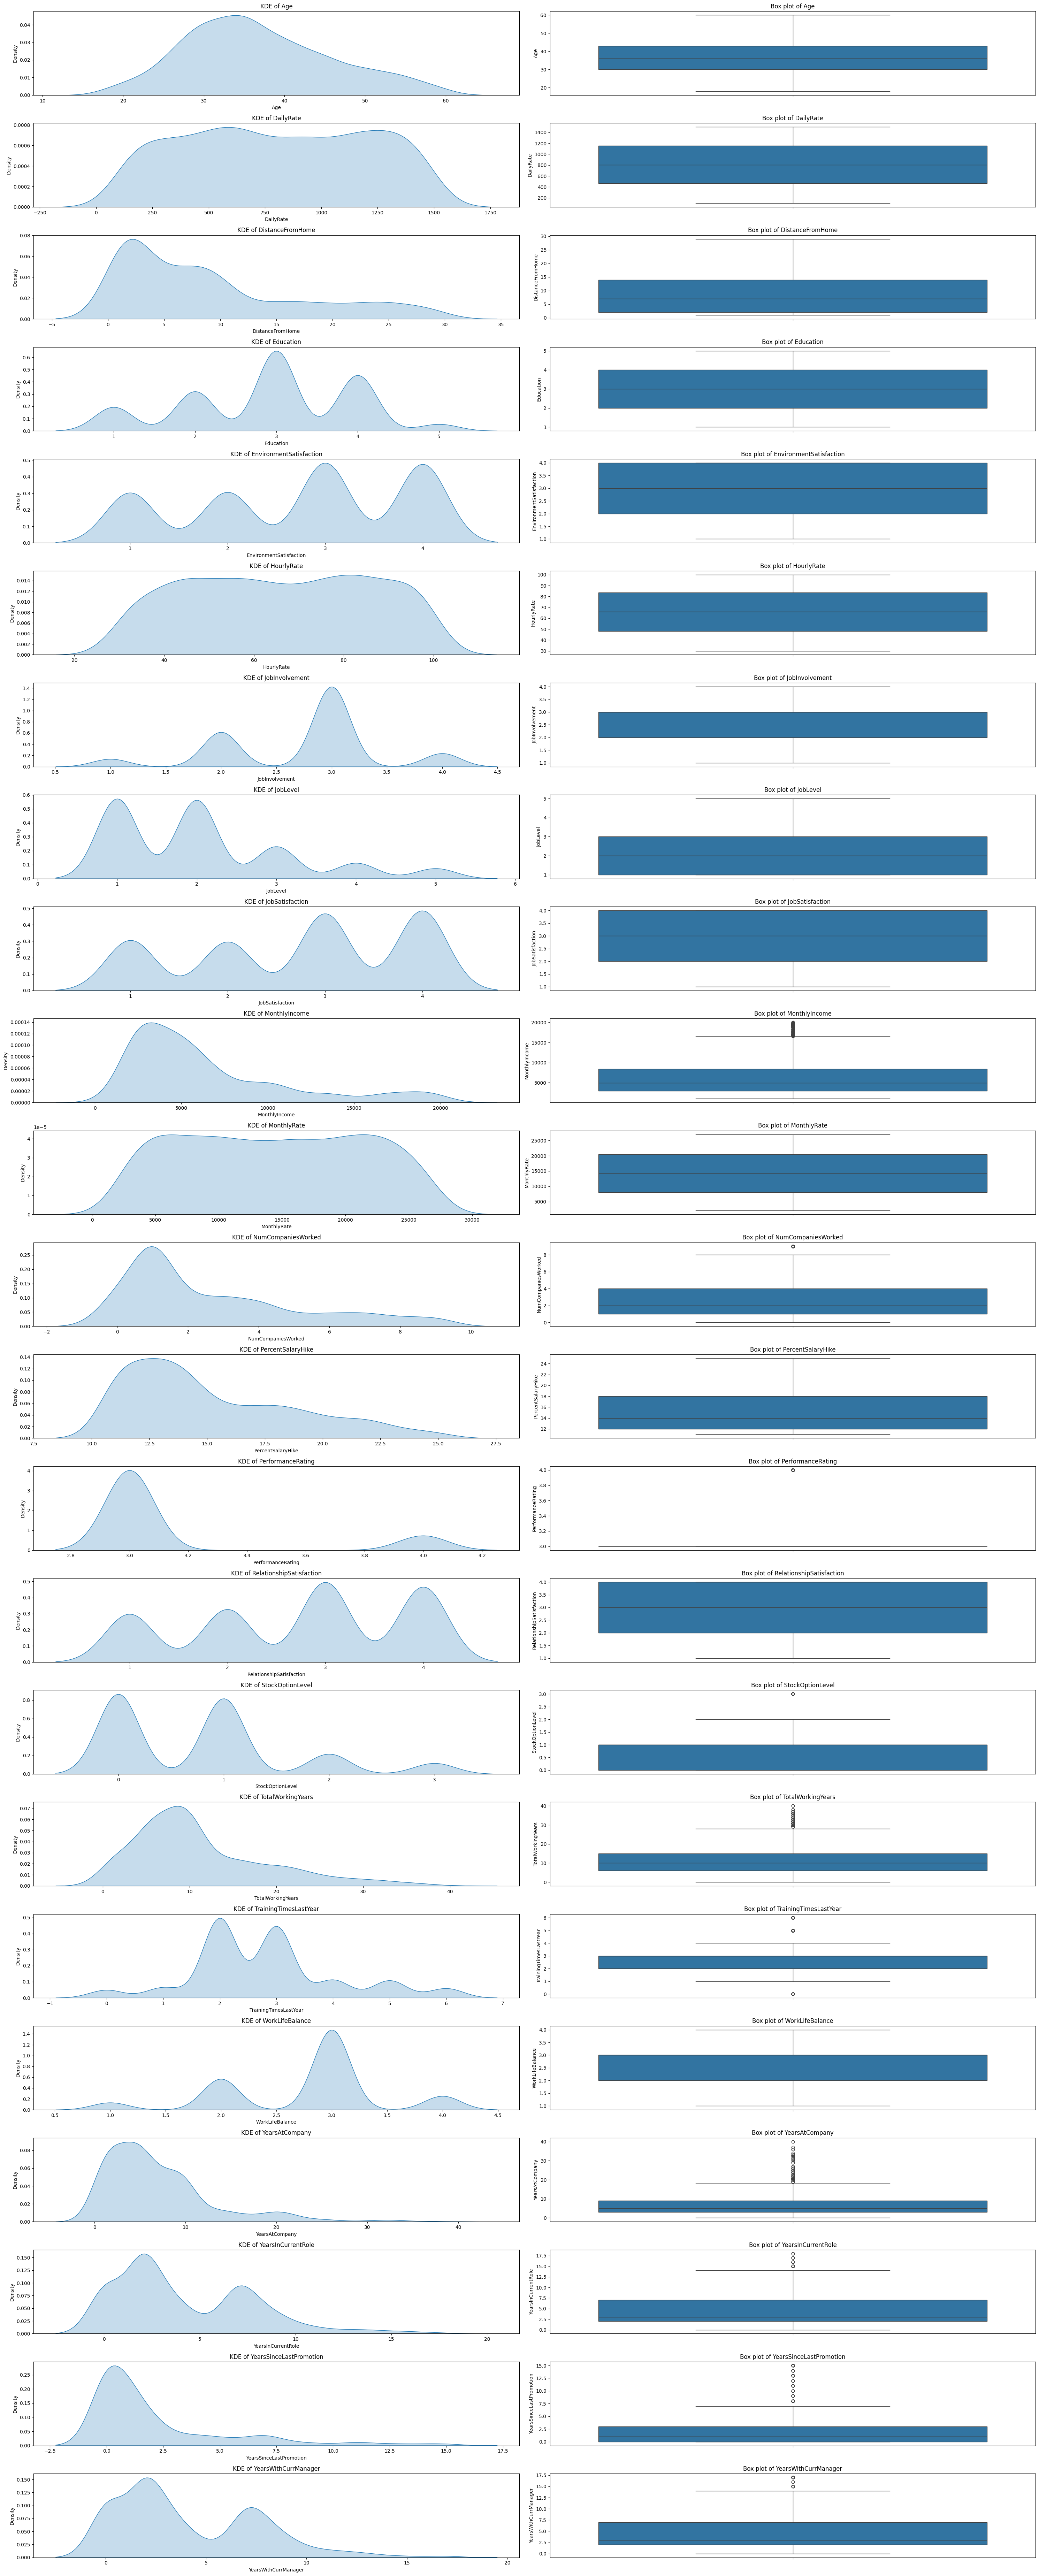

In [ ]:
# Assuming num_cols should contain the numerical columns from the DataFrame 'df'
num_cols = df.select_dtypes(include=['number']).columns

fig = plt.figure(figsize=(30, 80))  # Adjusted figure size for a taller layout
grid = plt.GridSpec(25, 2)

counter = 0

for col in df[num_cols]:
    # KDE plot
    kde_ax = fig.add_subplot(grid[counter, 0])
    sns.kdeplot(x=col, data=df, fill=True, ax=kde_ax)
    kde_ax.set_title(f'KDE of {col}')

    # Box plot
    box_ax = fig.add_subplot(grid[counter, 1])
    sns.boxplot(data=df[col], ax=box_ax)
    box_ax.set_title(f'Box plot of {col}')

    counter += 1
plt.tight_layout()
plt.show()

- Berdasarkan ringkasan ini, terdapat outlier yang tampak dalam kumpulan data yaitu pada kolom YearsWithCurrManager, yearsSinceLastPromotion, YearsinCurrentRole, YearsAtCurrentCompany, TotalWorkingYears,NumsCompanyWorked.
- Dalam kumpulan data ini, nilai tersebut tidak hanya menonjol, tetapi juga merupakan nilai tinggi namun tidak mustahil sehingga outlier tidak dihapus, mengecualikan nilai ekstrem hanya karena ekstremitasnya dapat mendistorsi hasil dengan menghilangkan informasi.

In [ ]:
# check the unique value each coloumns
# for col in df.columns:
#     print(f"{col} : {df[col].unique()}")

In [ ]:
#Show the number of unique observations for each column
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [ ]:
# from the above unique value we can notice that "EmployeeCount" just have 1 unique value, "EmployeeNumber" with its variance (1470), we can drop this columns that has no meaning in our analysis
cols = ["EmployeeCount", "EmployeeNumber"]
df.drop(columns=cols, inplace=True)

In [ ]:
# from the above cell we can notice that all the employees are above 18 so we will drop this column
df.drop( columns = ['Over18'], inplace=True)

In [ ]:
# "StandardHours" with same value 80 (1470), we can drop this columns that has no meaning in our analysis
df['StandardHours'].value_counts()

,count
StandardHours,
80,1470


In [ ]:
#from the above cell we can notice that all the StandardHours are all 80 so we will also drop it
df.drop( columns = ['StandardHours'], inplace=True)

## EDA

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 50)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Attrition Rate

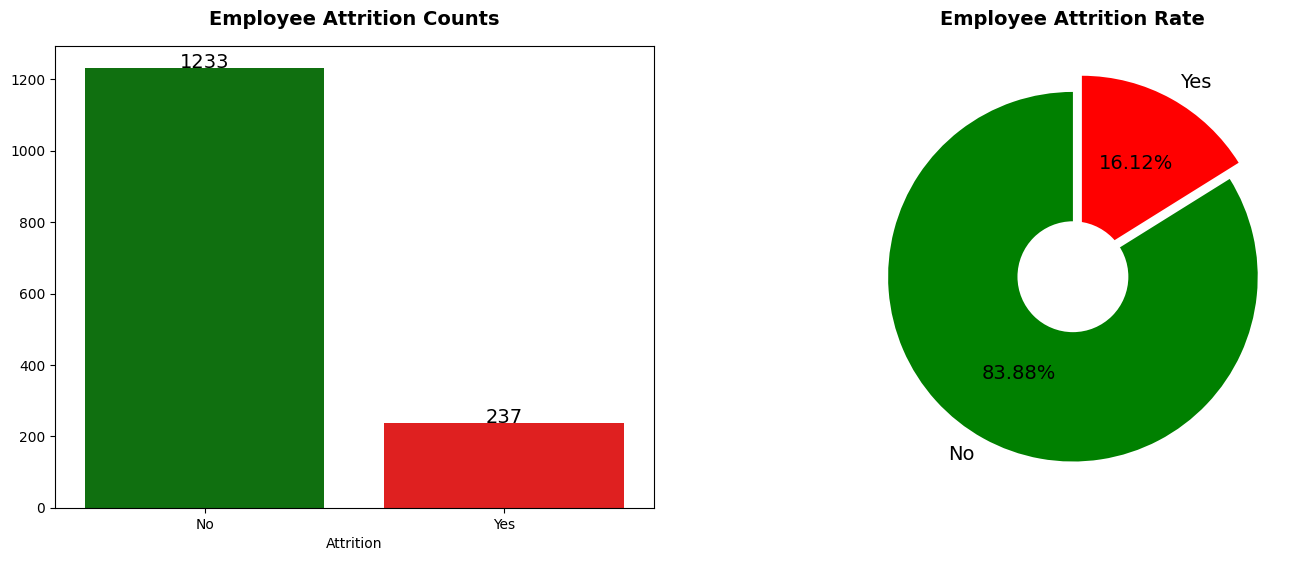

In [ ]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x = attrition_rate.index, y = attrition_rate.values, palette={'Yes': 'red', 'No': 'green'})
plt.title("Employee Attrition Counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette(['green', 'red'], len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

- tidak ada berkurangnya tenaga kerja yang secara signifikan lebih tinggi, kebanyakan orang di perusahaan tidak ingin keluar
- tingkat atrisi perusahaan sebesar 16,12%. Artinya sekitar 16,12% karyawan memutuskan keluar dari perusahaan selama periode yang dianalisis.

### Average of Tenure

Masa kerja rata-rata mengukur rata-rata jumlah tahun seorang karyawan tinggal di perusahaan sebelum keluar. Hal ini dapat memberikan wawasan tentang stabilitas tenaga kerja dan kepuasan karyawan dalam organisasi.

In [ ]:
avg_tenure = df['YearsAtCompany'].mean()
print(f'Average years of employee to leave the company is {avg_tenure} years')

Average years of employee to leave the company is 7.0081632653061225 years


Rata-rata masa kerja karyawan sebelum memutuskan keluar adalah 7,01 tahun. Dengan rata-rata masa kerja tersebut, dapat disimpulkan bahwa banyak karyawan yang merasa nyaman dan sudah lama bekerja di perusahaan.

### Employee's Demographics



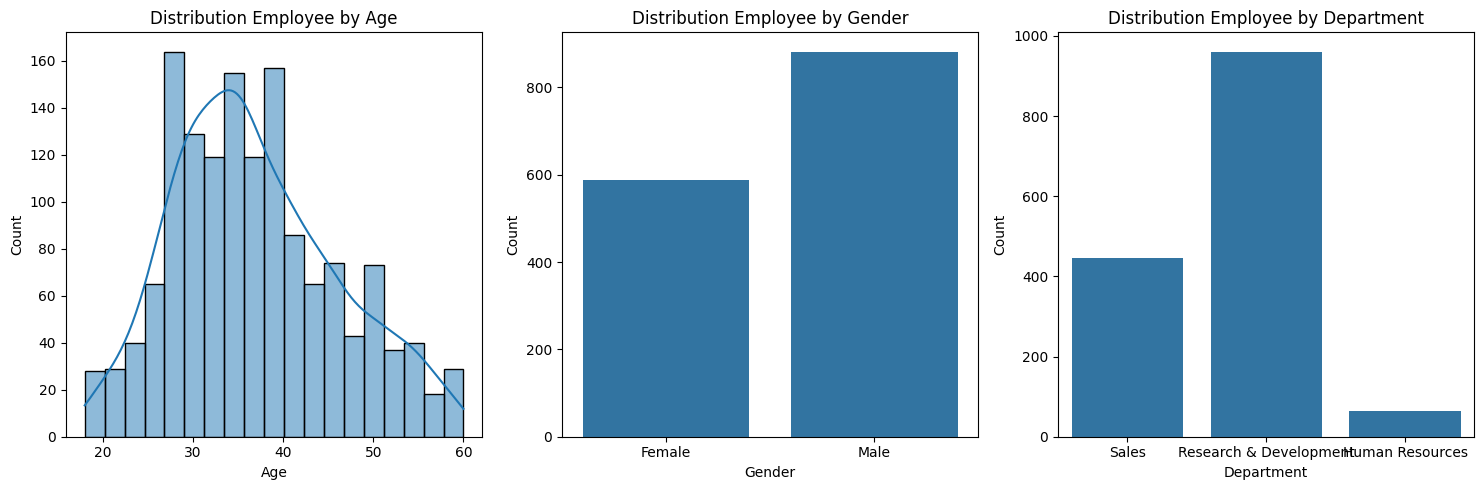

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Distribution Employee by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Gender', ax=axes[1])
axes[1].set_title('Distribution Employee by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='Department', ax=axes[2])
axes[2].set_title('Distribution Employee by Department')
axes[2].set_xlabel('Department')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

- Usia: Sebagian besar karyawan perusahaan berada pada kelompok usia 30-35 tahun. Hal ini menandakan bahwa perusahaan mempunyai banyak karyawan yang berada pada usia produktif dan berpengalaman.
- Jenis Kelamin: Mayoritas karyawan di perusahaan ini adalah laki-laki. Jumlah pekerja laki-laki jauh lebih banyak dibandingkan pekerja perempuan.
- Departemen: Sebagian besar karyawan perusahaan terkonsentrasi di departemen penelitian dan pengembangan. Hal ini menunjukkan bahwa perusahaan sangat fokus pada kegiatan penelitian dan pengembangan produk atau jasa.

In [ ]:
df_attrition = df[df['Attrition'] == 'Yes']
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Yes,14,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,No,23,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,No,11,3,3,0,8,2,3,4,2,1,3


In [ ]:
# Fungsi untuk Menghitung Attrition Rate
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

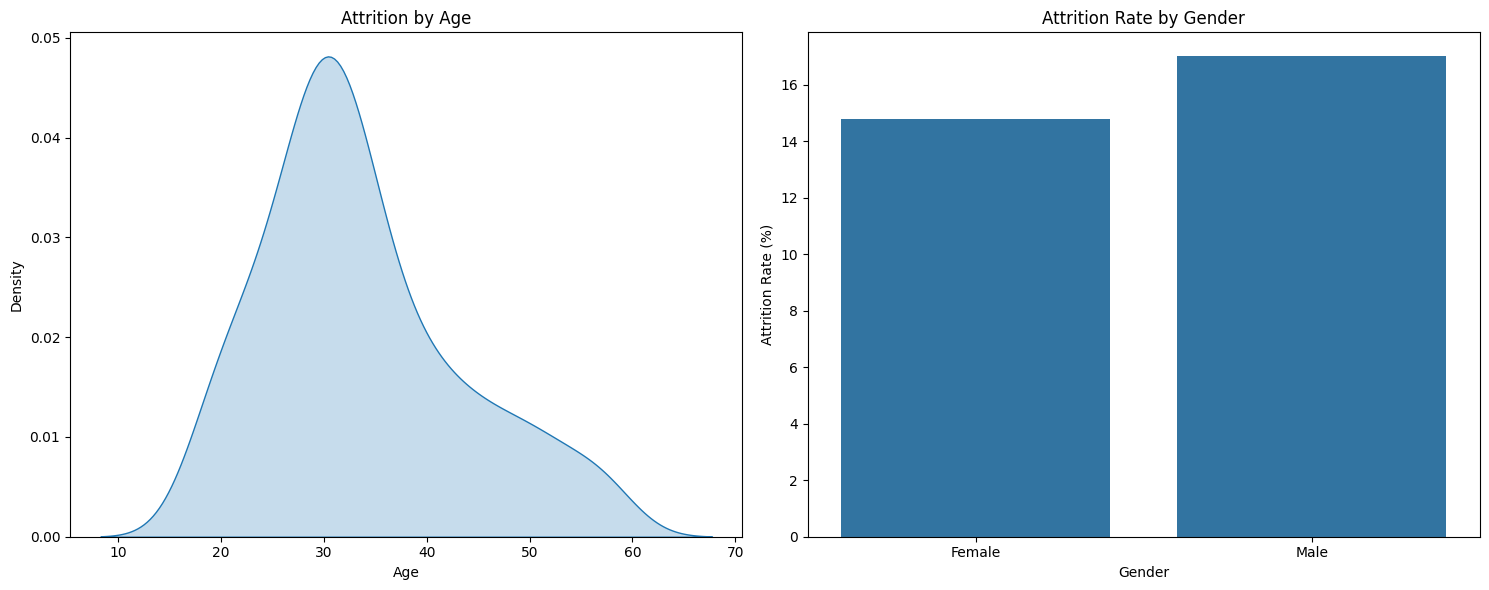

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Plot 1: KDE plot of Age with Attrition hue
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Plot 2: Bar plot of Gender count with Attrition hue
attrition_rate_df = calculate_attrition_rate(df, 'Gender')
sns.barplot(data=attrition_rate_df, x='Gender', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

- Karyawan yang lebih muda, terutama yang berada dalam kelompok usia 30-35 tahun, tampaknya lebih besar kemungkinannya untuk meninggalkan perusahaan dibandingkan kelompok usia lainnya. Hal ini dapat disebabkan oleh sejumlah faktor, termasuk pencarian pengalaman baru, ketidakpuasan terhadap gaji atau jalur karier, atau tawaran pekerjaan yang lebih menarik di tempat lain.
- Karyawan yang lebih tua cenderung memiliki stabilitas kerja yang lebih baik. Hal ini mungkin disebabkan oleh beberapa faktor, seperti tingkat komitmen yang lebih tinggi terhadap perusahaan, sulitnya mendapatkan pekerjaan baru di usia yang lebih tua, atau adanya manfaat pensiun yang bersifat wajib. Pengurangan berdasarkan Gender

Terdapat perbedaan yang signifikan dalam tingkat turnover antara laki-laki dan perempuan. Pegawai laki-laki cenderung lebih sering mengundurkan diri dibandingkan pegawai perempuan. Namun hal ini mungkin disebabkan oleh ketidakseimbangan sampel pada kedua kelompok.

In [ ]:
education_mapping = {1 : 'Below College',
                     2 : 'College',
                     3 : 'Bachelor',
                     4 : 'Master',
                     5 : 'Doctor'}

df['education_cat'] = df['Education'].replace(education_mapping)
df['education_cat']

,education_cat
0,College
1,Below College
2,College
3,Master
4,Below College
5,College
6,Bachelor
7,Below College
8,Bachelor
9,Bachelor


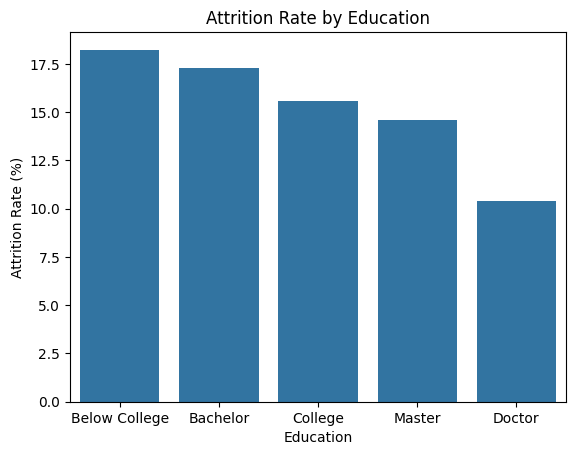

In [ ]:
attrition_rate_df = calculate_attrition_rate(df, 'education_cat')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='education_cat', y='AttritionRate')
plt.title(f'Attrition Rate by Education')
plt.xlabel('Education')
plt.ylabel('Attrition Rate (%)')

plt.show()

Dalam analisis ini, karyawan dengan tingkat pendidikan yang lebih tinggi cenderung memiliki tingkat loyalitas yang lebih tinggi terhadap perusahaan. Hal ini dibuktikan dengan rendahnya tingkat turnover pada pegawai bergelar magister dan doktoral. Namun analisis lebih lanjut diperlukan untuk mengetahui apakah peningkatan tingkat pendidikan cenderung meningkatkan kemungkinan bertahan di perusahaan.

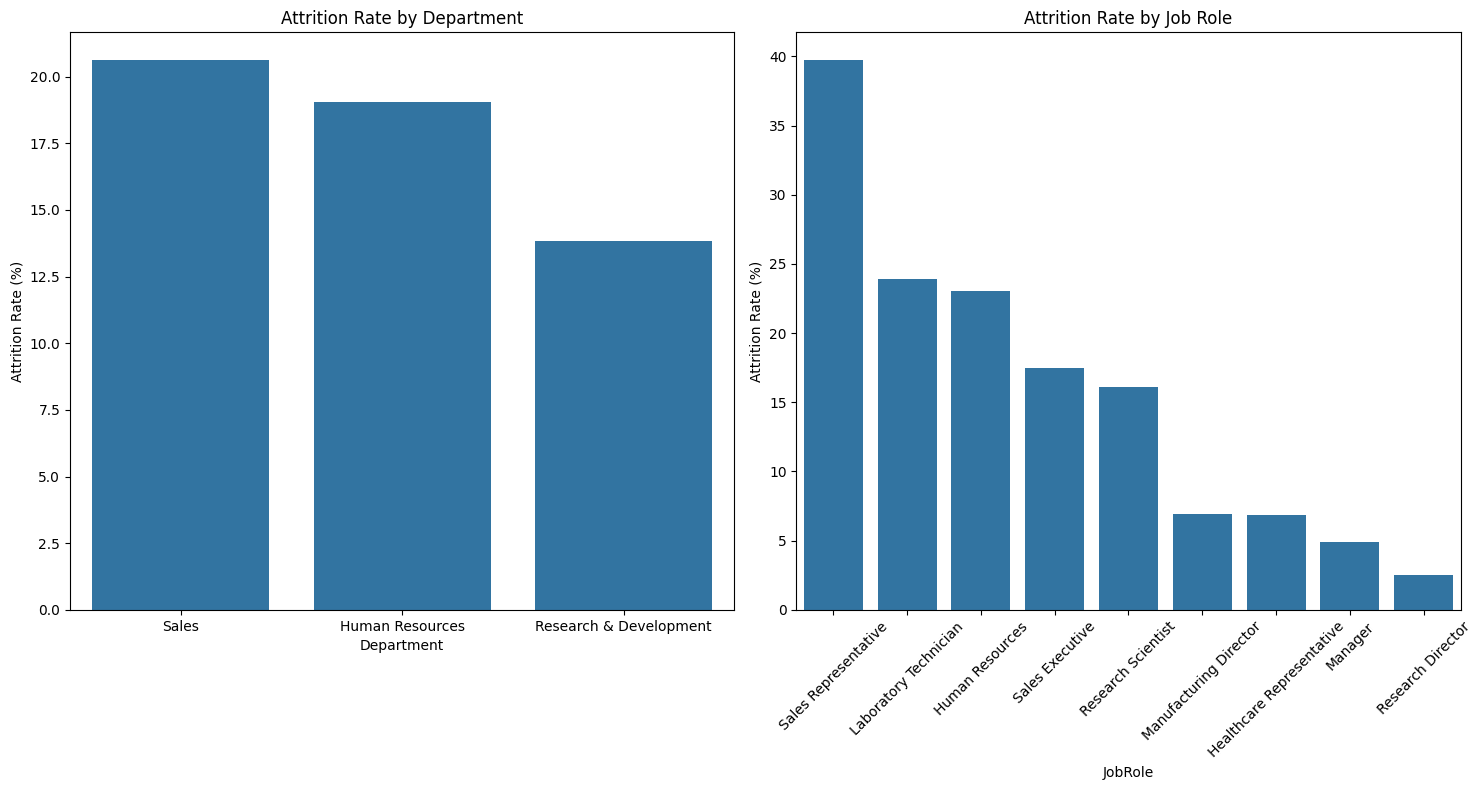

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# Plot 1: KDE plot of Age with Attrition hue
attrition_rate_df = calculate_attrition_rate(df, 'Department')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='Department', y='AttritionRate', ax=axes[0])
axes[0].set_title(f'Attrition Rate by Department')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Attrition Rate (%)')

# Plot 2: Bar plot of Gender count with Attrition hue
attrition_rate_df = calculate_attrition_rate(df, 'JobRole')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='JobRole', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Job Role')
axes[1].set_xlabel('JobRole')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. Departemen penjualan dan posisi perwakilan penjualan dan teknisi laboratorium memiliki tingkat pergantian yang tinggi. Hal ini mungkin disebabkan oleh faktor-faktor seperti tekanan kerja yang tinggi, tujuan penjualan yang tidak dapat dicapai, atau kurangnya kepuasan kerja.
1. Departemen penelitian dan pengembangan serta posisi ilmuwan riset dan direktur penelitian memiliki tingkat pergantian yang rendah. Hal ini mungkin disebabkan oleh sifat pekerjaan yang menantang, peluang yang lebih besar untuk pengembangan karir, atau lingkungan kerja yang lebih mendukung.

Berdasarkan analisis grafik di atas dapat disimpulkan bahwa tingkat turnover dipengaruhi oleh departemen dan jabatan yang dijabat. Karyawan di departemen penjualan dan mereka yang memegang posisi perwakilan penjualan dan teknisi laboratorium cenderung lebih sering meninggalkan perusahaan dibandingkan karyawan di departemen penelitian dan pengembangan dan mereka yang memegang posisi ilmuwan riset dan direktur penelitian. Perbedaan ini mungkin disebabkan oleh faktor-faktor seperti tekanan kerja, peluang pengembangan karir, dan kepuasan kerja.

### Satisfaction Factors

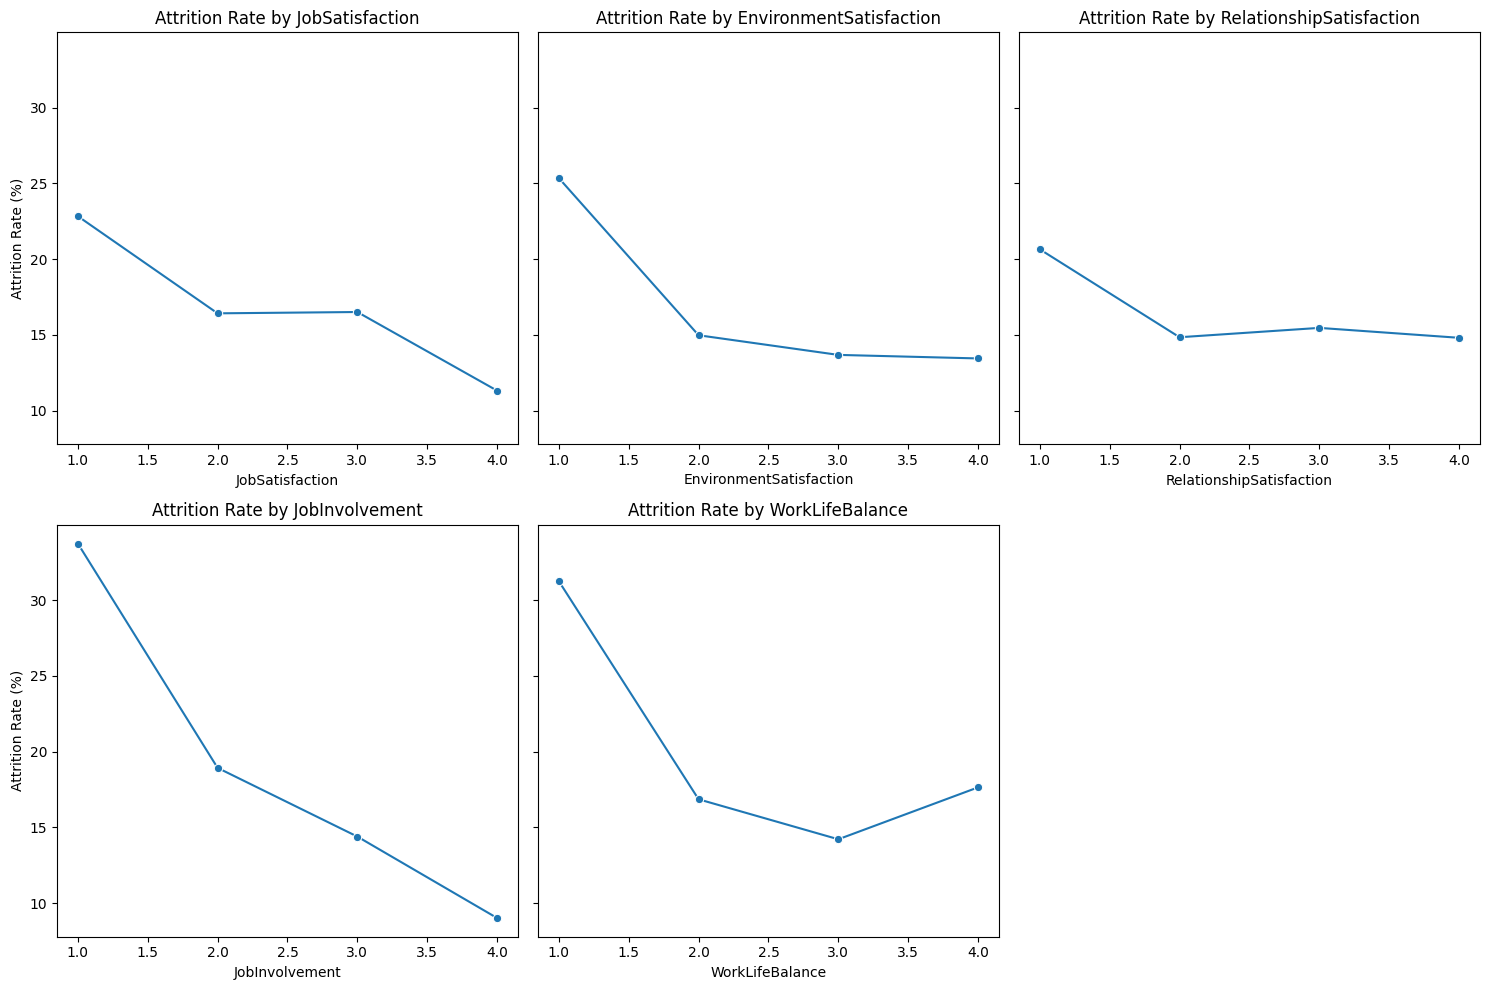

In [ ]:
# Daftar kolom kepuasan yang ingin divisualisasikan
satisfaction_cols = [
    'JobSatisfaction', 'EnvironmentSatisfaction',
    'RelationshipSatisfaction', 'JobInvolvement',
    'WorkLifeBalance'
]

# Buat figure dan axes untuk subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Flatten axes untuk memudahkan iterasi
axes = axes.flatten()

# Plot masing-masing satisfaction variable
for i, col in enumerate(satisfaction_cols):
    attrition_rate_df = calculate_attrition_rate(df, col)
    sns.lineplot(data=attrition_rate_df, x=col, y='AttritionRate', marker='o', ax=axes[i])
    axes[i].set_title(f'Attrition Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Attrition Rate (%)')

# Hapus subplot kosong jika jumlahnya tidak genap
if len(satisfaction_cols) % 2 != 0:
    fig.delaxes(axes[-1])

# Tambahkan padding antara plots
plt.tight_layout()
plt.show()

- Kepuasan Kerja: Karyawan dengan tingkat kepuasan kerja yang rendah cenderung lebih sering keluar. Hal ini menunjukkan bahwa aspek pekerjaan itu sendiri, seperti tugas, tanggung jawab, dan tantangan, sangat mempengaruhi keputusan karyawan untuk tetap tinggal atau keluar.
- Kepuasan Lingkungan: Lingkungan kerja yang tidak nyaman, tidak mendukung, atau tidak konsisten dengan nilai-nilai karyawan dapat mendorong mereka untuk mencari pekerjaan di tempat lain.
- Kepuasan hubungan: Hubungan yang baik dengan rekan kerja dan supervisor dapat meningkatkan rasa memiliki dan loyalitas terhadap organisasi, sehingga mengurangi turnover.
- Keterlibatan Kerja: Karyawan yang merasa terlibat dalam pekerjaannya cenderung lebih loyal dan berkomitmen terhadap organisasi.
- Keseimbangan kehidupan kerja: Keseimbangan kehidupan kerja yang baik sangat penting bagi karyawan. Karyawan yang merasa pekerjaannya mengganggu kehidupan pribadinya lebih besar kemungkinannya untuk keluar dari perusahaan.


Selain itu, hasil analisis menunjukkan adanya korelasi yang kuat antara tingkat keterlibatan kerja dengan tingkat turnover. Karyawan dengan tingkat keterlibatan kerja yang rendah cenderung lebih sering meninggalkan organisasi. Hal ini menunjukkan bahwa kurangnya keterlibatan kerja, yang mungkin disebabkan oleh kurangnya peluang pengembangan karir atau kurangnya tantangan dalam pekerjaan, dapat mendorong karyawan untuk mencari pekerjaan yang lebih memuaskan di tempat lain.

### Salary and Benefit Factors

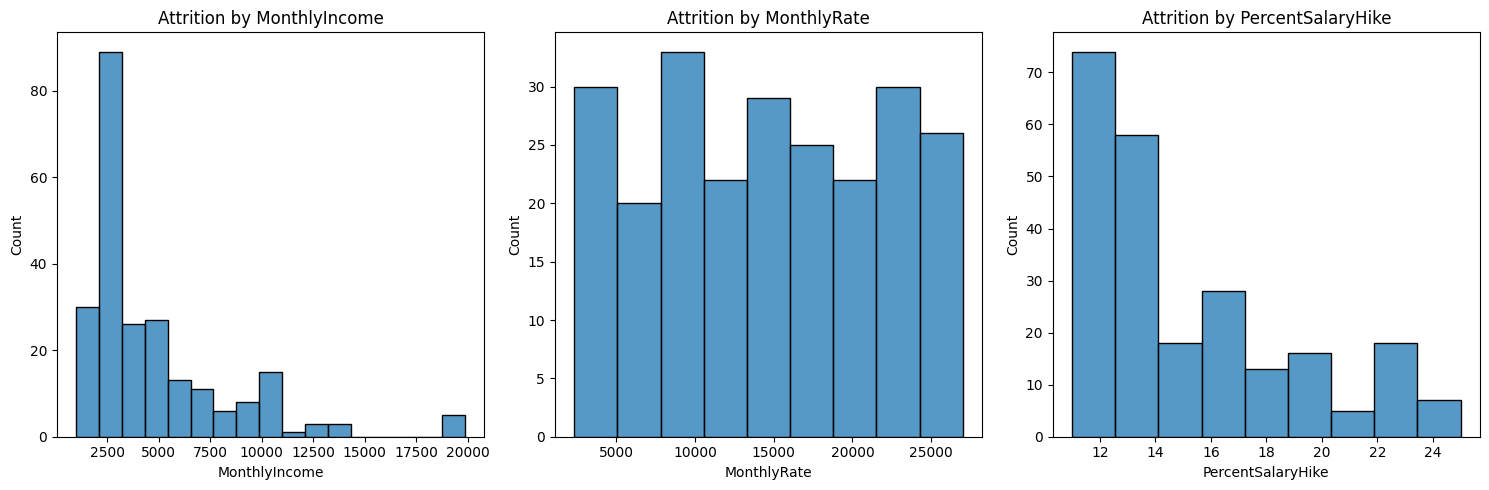

In [ ]:
salary_col = ['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, col in enumerate(salary_col):
    sns.histplot(data=df_attrition, x=col, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Turnover berdasarkan pendapatan bulanan

- Grafik ini menunjukkan bahwa sebagian besar karyawan yang keluar memiliki pendapatan bulanan di kisaran 5.000 hingga 7.500.
- Terdapat penurunan tingkat turnover yang signifikan pada karyawan dengan pendapatan bulanan di atas 7.500, yang menunjukkan bahwa karyawan dengan gaji lebih tinggi cenderung bertahan lebih lama di perusahaan.

Turnover berdasarkan Tarif Bulanan:
- Grafik turnover menurut Tarif Bulanan tidak menunjukkan pola yang jelas antara tingkat gaji dan tingkat turnover.
- Perputaran berfluktuasi secara acak pada rentang gaji yang berbeda.

Turnover berdasarkan Persen Kenaikan Gaji:

- Grafik ini menunjukkan bahwa karyawan yang menerima kenaikan gaji lebih rendah (di bawah 16%) cenderung memiliki tingkat turnover yang lebih tinggi.
- Semakin tinggi persentase kenaikannya maka semakin rendah tingkat turnovernya. Hal ini menunjukkan bahwa kenaikan gaji yang signifikan dapat menjadi faktor retensi yang efektif.

## Questions to Answer

1. Apa saja faktor utama yang menyebabkan attrition karyawan?
2. Bagaimana MonthlyIncome bervariasi di berbagai departemen dan JobRole?
3. Apakah ada korelasi antara YearsAtCompany dan Attrition?
4. Bagaimana StockOption berbeda menurut JobRole?
5. Apa dampak Lembur terhadap kinerja karyawan (PerformanceRating)?
6. Apakah ada pola dalam Attrition berdasarkan frekuensi BusinessTravel?
7. Jabatan mana yang memiliki rata-rata YearsAtCompany tertinggi?
8. Apakah ada hubungan antara EducationField dan PerformanceRating?
9. Bagaimana DistanceFromHome memengaruhi attrition karyawan?
10. Bagaimana Usia mempengaruhi atrisi?

### Q1.	Apa saja faktor utama yang menyebabkan attrition karyawan?

In [ ]:
import plotly.express as px
fig = px.histogram(df, x='JobRole', color='Attrition', barmode='group',
             facet_col='OverTime', facet_row='WorkLifeBalance', text_auto=True, color_discrete_sequence=["red", "green"],
             title="Attrition by Job Role, OverTime, and Work-Life Balance")
fig.update_layout(xaxis_title='Job Role', yaxis_title='Count', height=800)
fig.show()

- Karyawan yang bekerja lembur sebagai Ilmuwan Riset, Teknisi Lab, dan Eksekutif Penjualan cenderung meninggalkan perusahaan meskipun mereka memiliki Keseimbangan Kehidupan Kerja yang lebih baik bisa dilihat pada WorkLifeBalance tingkat 3.

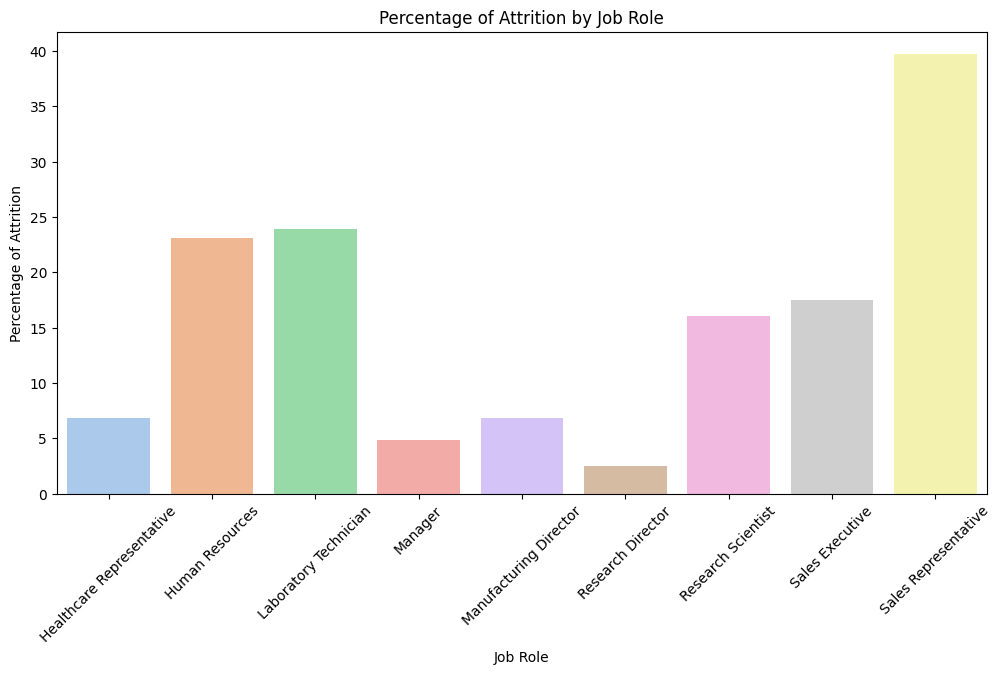

In [ ]:
attrition_by_role = df[df['Attrition'] == 'Yes'].groupby('JobRole').size() / df.groupby('JobRole').size() * 100

attrition_by_role = attrition_by_role.reset_index()
attrition_by_role.columns = ['JobRole', 'Attrition (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='Attrition (%)', data=attrition_by_role, palette='pastel')
plt.xlabel('Job Role')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()


- sales memiliki attrition yang paling tinggi, mungkin karena sales memiliki tekanan kerja yang lebih tinggi dari kebanyakan. sedangkan selanjutnya adalah sumber daya manusia dan teknisi laboratorium

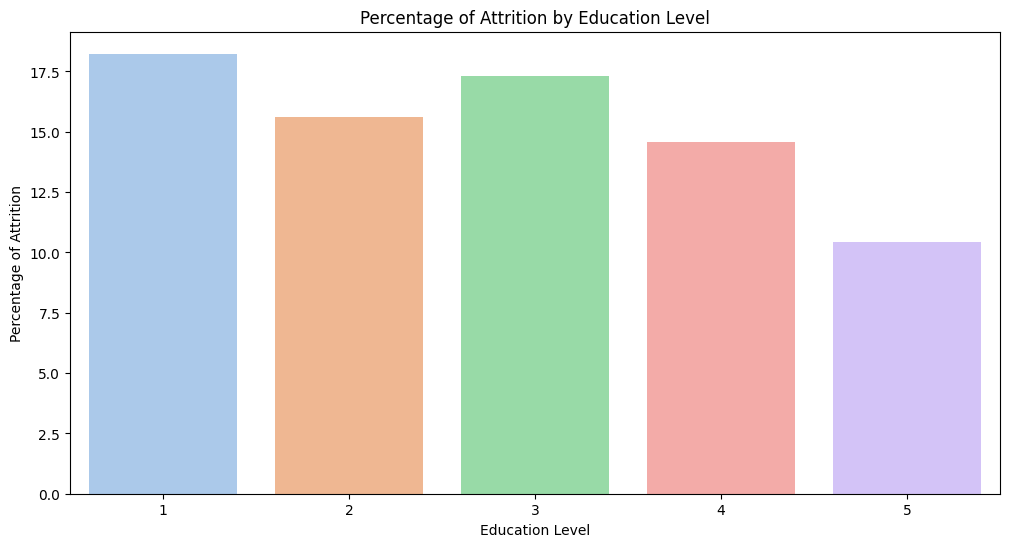

In [ ]:
attrition_by_education = df[df['Attrition'] == 'Yes'].groupby('Education').size() / df.groupby('Education').size() * 100

attrition_by_education = attrition_by_education.reset_index()
attrition_by_education.columns = ['Education', 'Attrition (%)']
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Attrition (%)', data=attrition_by_education, palette='pastel')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Education Level')
plt.show()


seiring dengan semakin tingginya pendidikan, semakin rendah tingkatnya, dokter memiliki angka yang paling rendah sementara di bawah perguruan tinggi memiliki angka yang lebih tinggi. mungkin karyawan yang berpendidikan lebih tinggi mungkin lebih mungkin untuk menemukan peran pekerjaan yang selaras dengan tujuan karier mereka

### Q2. Bagaimana MonthlyIncome bervariasi di berbagai departemen dan JobRole?

In [ ]:
fig = px.histogram(df, x='Department', y='MonthlyIncome', color='Department',
             title="Average Monthly Income Across Different Departments",histfunc='avg' )
fig.update_layout(xaxis_title='Department', yaxis_title='Monthly Income')
fig.show()

Semua Departemen hampir memiliki pendapatan bulanan rata-rata yang sama yaitu sekitar 7 ribu :
- Pertama adalah Penjualan dengan 6,96 ribu
- Kedua adalah SDM dengan 6,66 ribu
- Ketiga adalah Penelitian &amp; Pengembangan dengan 6,28 ribu

In [ ]:
fig = px.histogram(df, y='MonthlyIncome', x='JobRole', color='Department',
             title="Average Monthly Income Across Different Job Roles", histfunc='avg', barmode='group')
fig.update_layout(xaxis_title='Job Role', yaxis_title='MonthlyIncome', height=600)
fig.show()

 - Penghasilan bulanan rata-rata untuk maganers di berbagai jabatan dan departemen di atas 17 ribu
 - Penghasilan bulanan rata-rata untuk HR adalah 4,24 ribu
 - untuk Sales Executive adalah 6,9 ribu sementara Rep. 2,6 ribu

### Q3. Apakah ada korelasi antara YearsAtCompany dan Attrition?

In [ ]:
# Group by YearsAtCompany and Attrition, then count occurrences
count_df = df.groupby(["YearsAtCompany", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each YearsAtCompany
total_counts = df.groupby('YearsAtCompany').size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="YearsAtCompany")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df,
    x="YearsAtCompany",
    y='Percentage',
    color='Attrition',
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Line Plot of YearsAtCompany Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="YearsAtCompany",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

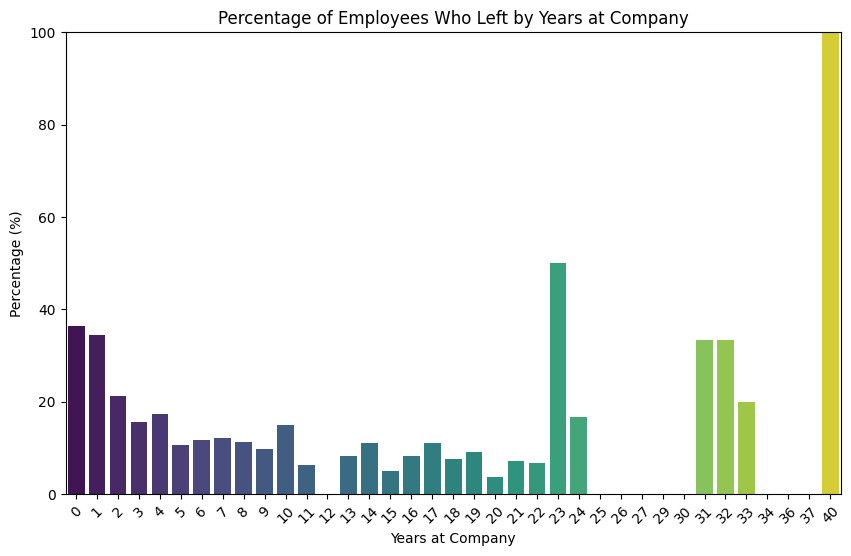

In [ ]:
df_left = df[df['Attrition'] == 'Yes']

# Count the total number of employees and the number of employees who left for each year
total_counts = df.groupby('YearsAtCompany').size()
left_counts = df_left.groupby('YearsAtCompany').size()

# Calculate percentages
percentages = (left_counts / total_counts * 100).fillna(0).reset_index(name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='YearsAtCompany', y='Percentage', palette='viridis')

# Customizing the plot
plt.title('Percentage of Employees Who Left by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
plt.show()


- karyawan baru cenderung bertahan lebih lama dibandingkan karyawan yang sudah lama bekerja kecuali pada dua tahun pertama karena 40% keluar pada dua tahun pertama.

<Figure size 1000x600 with 0 Axes>

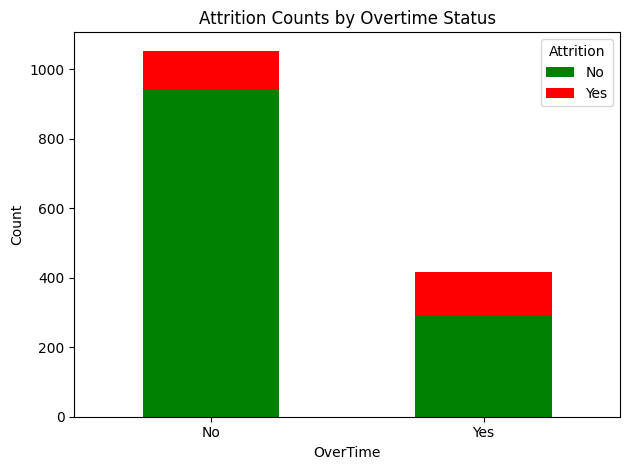

In [ ]:
attrition_counts = df.groupby(['OverTime', 'Attrition']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
attrition_counts.plot(kind='bar', stacked=True, color={'Yes': 'red', 'No': 'green'})
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Attrition Counts by Overtime Status')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout();
plt.show();


- 30% Karyawan yang bekerja lembur cenderung meninggalkan perusahaan

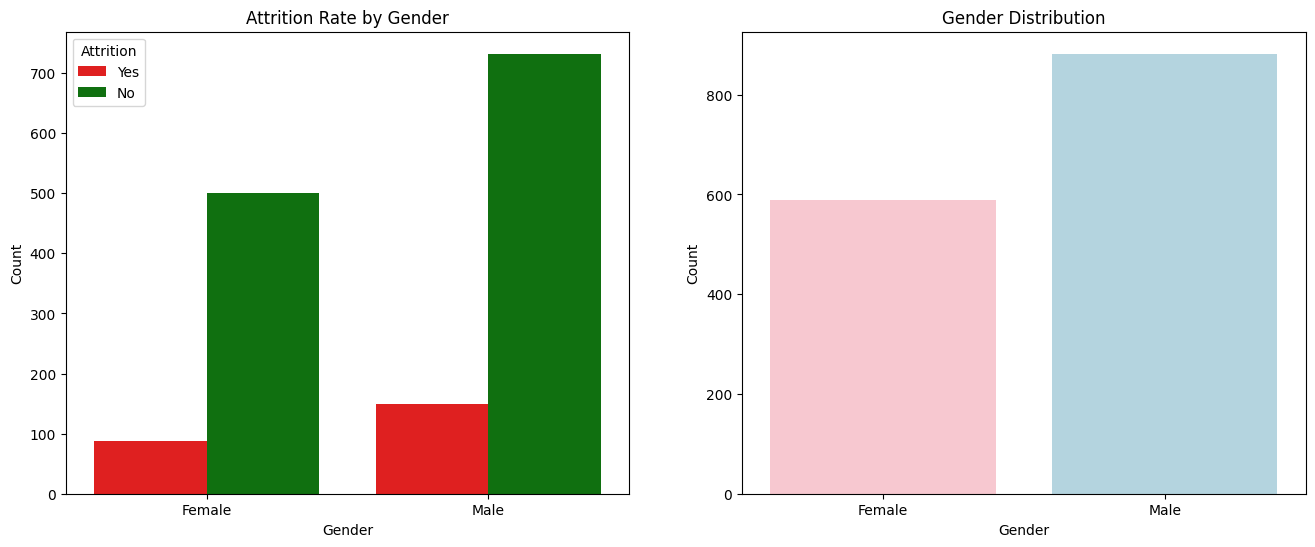

In [ ]:
#seeing attrition by gender
attrition_palette = {'Yes': 'red', 'No': 'green'}
gender_palette = {'Male': 'lightblue', 'Female': 'pink'}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=df, palette=attrition_palette, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Attrition Rate by Gender')

#Count of Male and Female Employees
sns.countplot(x='Gender', data=df, palette=gender_palette, ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender Distribution')

plt.show()

- laki-laki cenderung memiliki lebih banyak atrisi tetapi itu hanya karena jumlah mereka lebih banyak daripada perempuan.
- secara keseluruhan laki-laki meninggalkan 16% sementara perempuan meninggalkan 14%. jadi jenis kelamin tidak berpengaruh

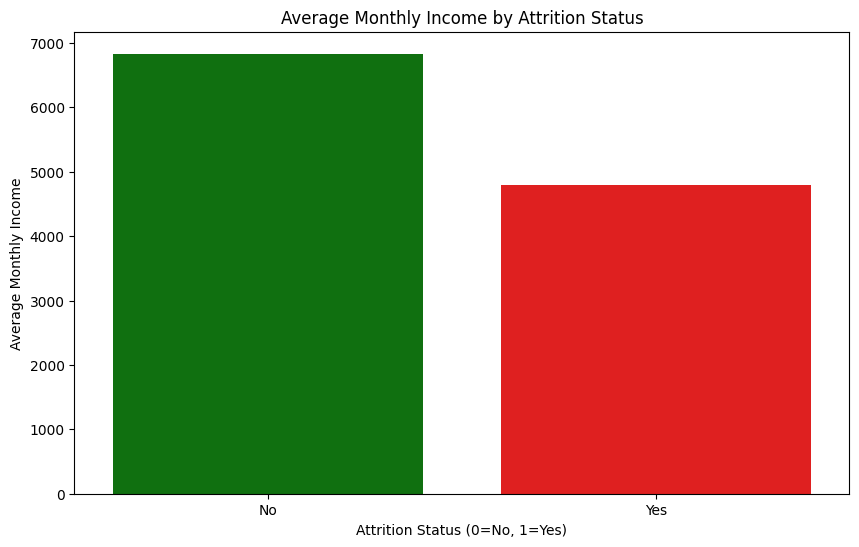

In [ ]:
average_income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='MonthlyIncome', data=average_income_by_attrition, palette={'Yes': 'red', 'No': 'green'})
plt.title('Average Monthly Income by Attrition Status')
plt.xlabel('Attrition Status (0=No, 1=Yes)')
plt.ylabel('Average Monthly Income')
plt.show()

- pendapatan bulanan rata-rata berdasarkan gesekan, orang-orang yang dibayar lebih rendah lebih mungkin untuk keluar

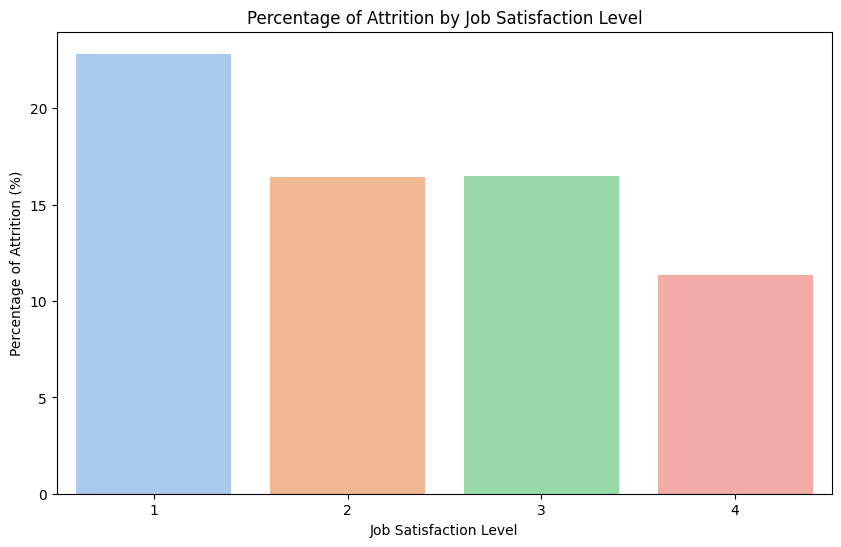

In [ ]:
attrition_by_satisfaction = df[df['Attrition'] == 'Yes'].groupby('JobSatisfaction').size() / df.groupby('JobSatisfaction').size() * 100
attrition_by_satisfaction = attrition_by_satisfaction.reset_index()
attrition_by_satisfaction.columns = ['JobSatisfaction', 'Attrition (%)']

plt.figure(figsize=(10, 6))
sns.barplot(x='JobSatisfaction', y='Attrition (%)', data=attrition_by_satisfaction, palette='pastel')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Percentage of Attrition (%)')
plt.title('Percentage of Attrition by Job Satisfaction Level')
plt.show()


- Kepuasan kerja yang lebih rendah berarti lebih banyak orang yang keluar

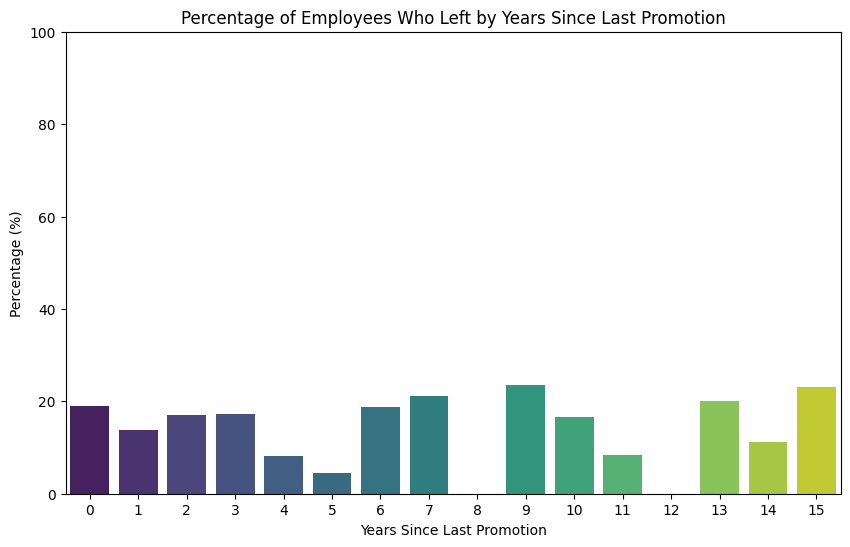

In [ ]:
# Filter for employees who have left the company
df_left = df[df['Attrition'] == 'Yes']
total_counts = df.groupby('YearsSinceLastPromotion').size()
left_counts = df_left.groupby('YearsSinceLastPromotion').size()
percentages = (left_counts / total_counts * 100).fillna(0).reset_index(name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='YearsSinceLastPromotion', y='Percentage', palette='viridis')
plt.title('Percentage of Employees Who Left by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
plt.show()


- promosi tampaknya tidak memiliki pola dan tidak berpengaruh terhadap keluarnya karyawan

### Q4. Apa perbedaan StockOption dengan JobRole?

In [ ]:
fig = px.histogram(df, y='JobRole', x='StockOptionLevel', color='StockOptionLevel', histfunc="count",
             title="Stock Option Level by Job Role", text_auto=True)
fig.update_layout(xaxis_title='Stock Option Level', yaxis_title='Job Role')
fig.show()

- Eksekutif Penjualan, Teknisi Laboratorium, dan Ilmuwan Riset memiliki persentase tertinggi dalam tingkat opsi saham (1,2,3)

### Q5. Apa dampak dari Lembur (OverTime) terhadap kinerja karyawan (PerformanceRating)?

In [ ]:
fig = px.histogram(df, x='OverTime', y='PerformanceRating', color='PerformanceRating', histfunc="count",
             title="Performance Rating by OverTime")
fig.update_layout(xaxis_title='OverTime', yaxis_title='Performance Rating')
fig.show()

- Tidak ada dampak yang hampir tidak ada pada peringkat kinerja karyawan karena mereka yang lembur dan memiliki peringkat sangat baik(3) atau luar biasa(4) memiliki persentase yang hampir sama 28%

### Q6. Apakah ada pola dalam Attrisi berdasarkan frekuensi BusinessTravel?

In [ ]:
fig = px.histogram(df, x='BusinessTravel', color="Attrition", color_discrete_map={"Yes":"red", "No":"green"}, barmode='group',
             title="Attrition by Business Travel Frequency", text_auto=True)
fig.update_layout(xaxis_title='Business Travel', yaxis_title='Count')
fig.show()

- Karyawan yang sering melakukan perjalanan dinas cenderung meninggalkan perusahaan sekitar 25% dari mereka

### Q7. Peran pekerjaan apa yang memiliki rata-rata YearsAtCompany tertinggi?

In [ ]:
fig = px.histogram(df, x='JobRole', y='YearsAtCompany', color='JobRole',
             title="Average Years at Company by Job Role",histfunc="avg",
             labels={'YearsAtCompany': 'Average Years at Company'})
fig.update_layout(xaxis_title='Job Role', yaxis_title='Average Years at Company')
fig.show()

- Manajer dan Direktur memiliki rata-rata masa kerja tertinggi di perusahaan dengan 14,5 tahun dan 11 tahun secara berurutan.


### Q8.  Apakah ada hubungan antara BidangPendidikan dan PendapatanBulanan?

In [ ]:
fig = px.histogram(df, x='EducationField', y='MonthlyIncome', color='EducationField', histfunc="avg",
             title="Monthly Income by Education Field")
fig.update_layout(xaxis_title='Education Field', yaxis_title='Monthly Income')
fig.show()

- Karyawan dengan latar belakang Pemasaran adalah yang tertinggi dengan pendapatan bulanan rata-rata 7,35 ribu dan hampir sama dengan bidang pendidikan SDM dengan 7,24 ribu.

### Q9. Bagaimana pengaruh jarak dari rumah (DistanceFromHome) terhadap atrisi karyawan?

In [ ]:
# Group by JobLevel and Attrition, then count occurrences
count_df = df.groupby(["DistanceFromHome", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each JobLevel
total_counts = df.groupby("DistanceFromHome").size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="DistanceFromHome")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df,
    x="DistanceFromHome",
    y='Percentage',
    color='Attrition',
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Line Plot of DistanceFromHome Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="DistanceFromHome",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

- seiring dengan bertambahnya jarak dari rumah, persentase atrisi meningkat dan berada pada tingkat tertinggi ketika jarak lebih besar dari 10, terutama antara 21-25 dengan persentase 25%
- jarak 5-10, persentase atrisi karyawan 14,6%
- 11-15, persentase 21,7% - 16-20, persentase 18,4

### Q10. Bagaimana Usia mempengaruhi Attrisi?

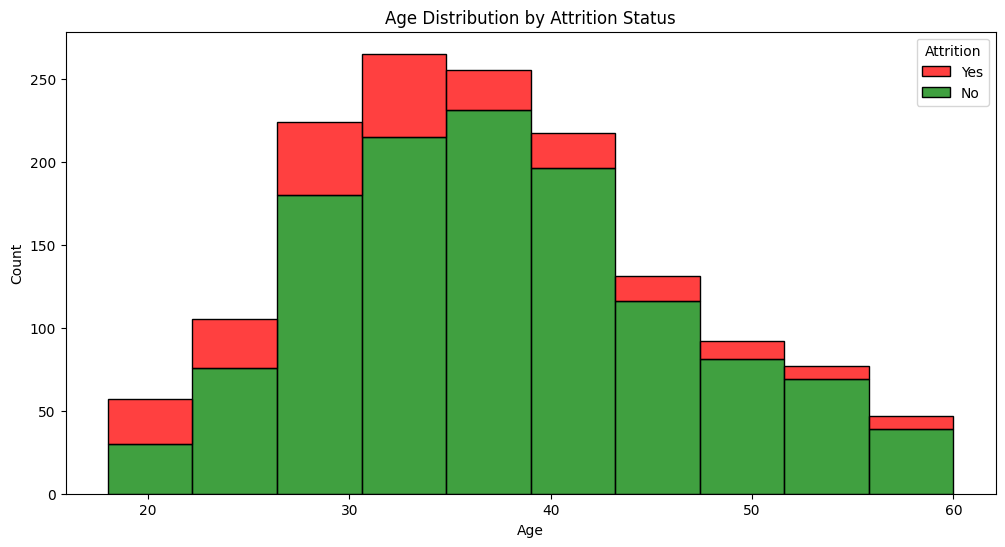

In [ ]:
#attrition in all ages
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette={'Yes': 'red', 'No': 'green'}, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Attrition Status')
plt.show()

In [ ]:
# Group by Age and Attrition, then count occurrences
count_df = df.groupby(['Age', 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each Age
total_counts = df.groupby('Age').size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on='Age')
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

fig = px.line(
    count_df,
    x="Age",
    y='Percentage',
    color='Attrition',
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Age Grouped by Attrition')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified")

# Show plot
fig.show()

- sebagian besar karyawan berusia antara 25-40 tahun
- sebagian besar orang dengan atrisi tinggi berusia antara 25-35 tahun
- karyawan yang sudah tua memiliki tingkat atrisi yang rendah, mungkin karena sulitnya mencari pekerjaan pada usia tersebut


In [ ]:
# Group by JobLevel and Attrition, then count occurrences
count_df = df.groupby(["DistanceFromHome", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each JobLevel
total_counts = df.groupby("DistanceFromHome").size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="DistanceFromHome")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df,
    x="DistanceFromHome",
    y='Percentage',
    color='Attrition',
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage of DistanceFromHome Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="DistanceFromHome",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

- seiring dengan bertambahnya jarak dari rumah, persentase atrisi meningkat dan berada pada tingkat tertinggi ketika jarak lebih besar dari 10, terutama antara 21-25 dengan persentase 25% - jarak 5-10, persentase atrisi karyawan 14,6% - 11-15, persentase 21,7% - 16-20, persentase 18,4

## Correlation Matrix

<Axes: >

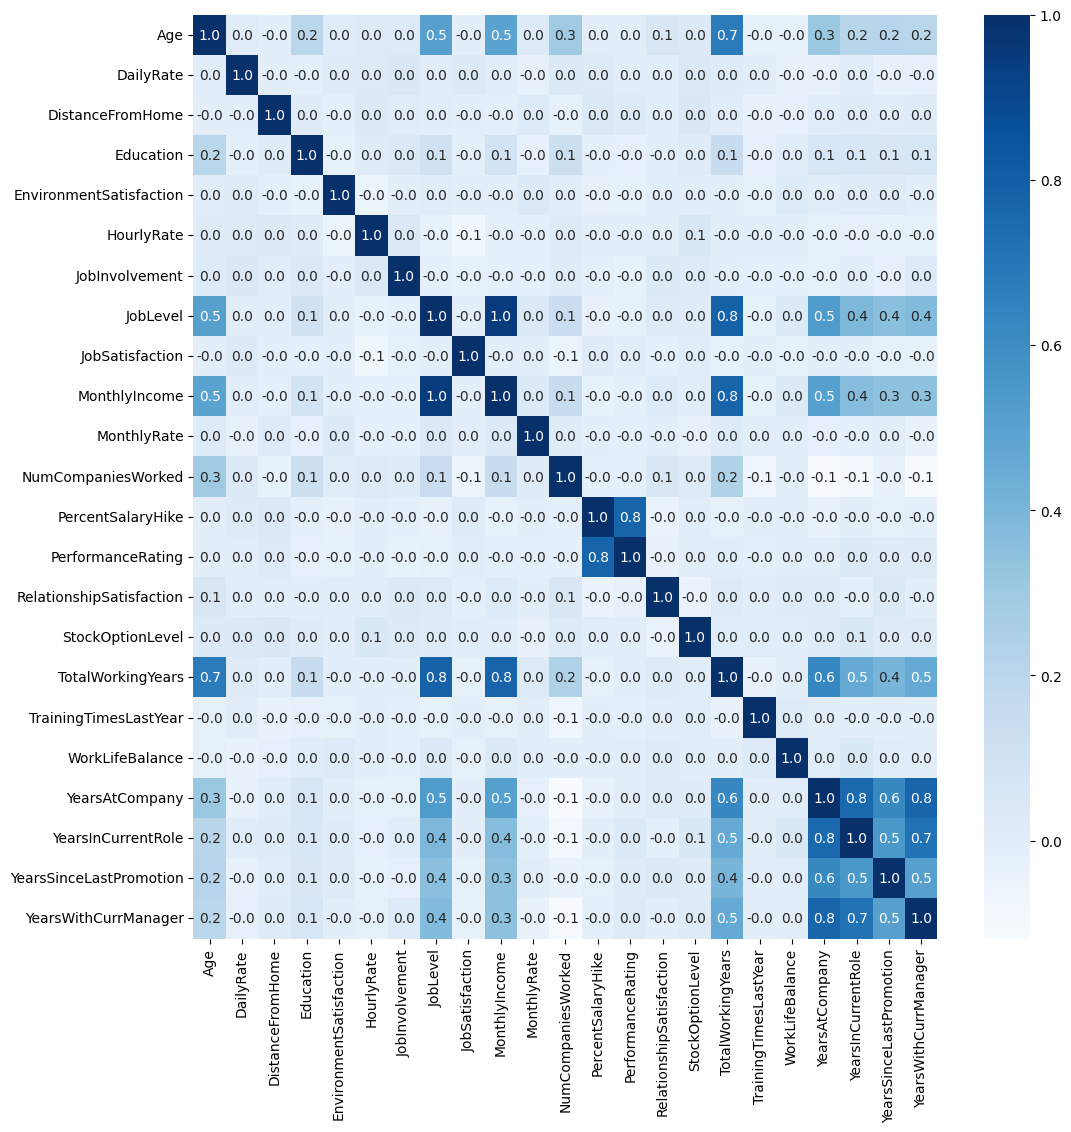

In [ ]:
df_num = df._get_numeric_data()

# define the figure
plt.figure(figsize=(12, 12))

# plot correlation heatmap
sns.heatmap(df_num.corr(), # Changed num to df_num
            cmap='Blues',
            annot=True,
            fmt='.1f')

Ditemukan korelasi positif yang kuat:

- Pengalaman Kerja: Variabel seperti TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, Years SinceLastPromotion, dan YearsWithCurrentManager menunjukkan korelasi positif yang kuat satu sama lain. Hal ini masuk akal karena semakin lama seseorang bekerja di suatu perusahaan, semakin lama pula mereka menduduki peran yang sama dan dengan manajer yang sama.
- Kepuasan Kerja: Variabel Kepuasan Kerja dan Kepuasan Lingkungan menunjukkan korelasi positif sedang. Hal ini menunjukkan bahwa karyawan yang puas terhadap pekerjaannya cenderung merasa puas dengan lingkungan kerjanya.
- Gaji dan Kepuasan: Meskipun terdapat korelasi positif antara Pendapatan Bulanan dan Kepuasan Kerja, namun korelasinya tidak terlalu kuat. Hal ini menunjukkan bahwa gaji bukanlah satu-satunya faktor yang mempengaruhi kepuasan kerja.